In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Бібліотека для роботи з часовими рядами
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<h1>Частина 1</h1>

<p>Dataset: 
    <a href="https://www.kaggle.com/datasets/imdevskp/corona-virus-report?resource=download&select=full_grouped.csv">
        https://www.kaggle.com/datasets/imdevskp/corona-virus-report?resource=download&select=full_grouped.csv
    </a>
</p>


<h3>Зчитуємо датасет з трендом по коронавірусу у світі</h3>

In [2]:
# Зчитуємо датасет з трендом грипу у світі:
covid_df = pd.read_csv('data/covid.csv', encoding='utf-8', index_col=['Date'], parse_dates=['Date'])
covid_df.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
Date,,,,,,,,,
2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
2020-01-22,Angola,0,0,0,0,0,0,0,Africa
2020-01-22,Antigua and Barbuda,0,0,0,0,0,0,0,Americas
2020-01-22,Argentina,0,0,0,0,0,0,0,Americas
2020-01-22,Armenia,0,0,0,0,0,0,0,Europe
2020-01-22,Australia,0,0,0,0,0,0,0,Western Pacific


In [3]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35156 entries, 2020-01-22 to 2020-07-27
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  35156 non-null  object
 1   Confirmed       35156 non-null  int64 
 2   Deaths          35156 non-null  int64 
 3   Recovered       35156 non-null  int64 
 4   Active          35156 non-null  int64 
 5   New cases       35156 non-null  int64 
 6   New deaths      35156 non-null  int64 
 7   New recovered   35156 non-null  int64 
 8   WHO Region      35156 non-null  object
dtypes: int64(7), object(2)
memory usage: 2.7+ MB


<h3>Відобразмо часову динаміку коронавірусу в Швеції та Австрії на одному графіку.</h3>

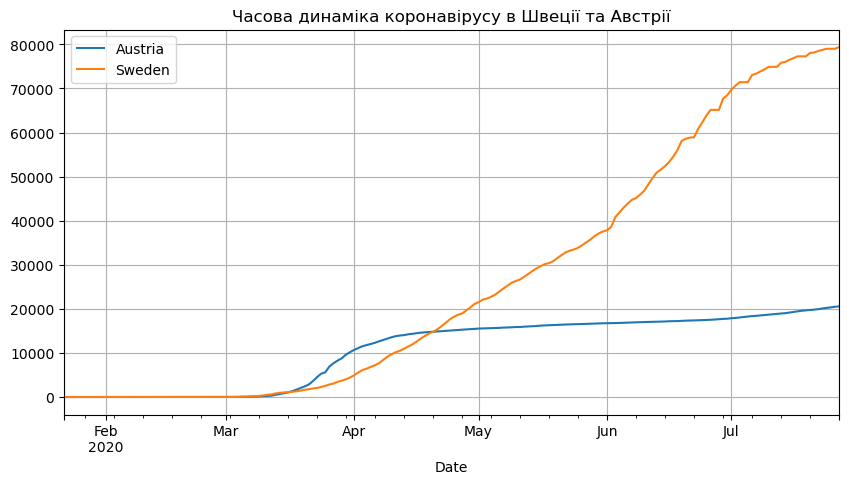

In [4]:
austria_data = covid_df[covid_df['Country/Region'] == 'Austria']
sweden_data = covid_df[covid_df['Country/Region'] == 'Sweden']


fig, ax = plt.subplots(figsize=(10, 5))
austria_data['Confirmed'].plot(ax=ax, label='Austria')
sweden_data['Confirmed'].plot(ax=ax, label='Sweden')
plt.title('Часова динаміка коронавірусу в Швеції та Австрії')
ax.grid()
ax.legend()
plt.show()

<h3>Дослідимо часові ряди ковіду в обох країнах</h3>

In [5]:
# Досліджуємо часовий ряд у Австрії:
austria_confirmed_cases = austria_data['Confirmed']
austria_confirmed_cases.describe()

count      188.000000
mean     10824.393617
std       7758.710717
min          0.000000
25%        124.250000
50%      15109.500000
75%      17012.250000
max      20558.000000
Name: Confirmed, dtype: float64

In [6]:
# Досліджуємо часовий ряд у Швеції:
sweden_confirmed_cases = sweden_data['Confirmed']
sweden_confirmed_cases.describe()

count      188.000000
mean     26452.978723
std      27714.070207
min          0.000000
25%        236.750000
50%      17872.000000
75%      47182.500000
max      79395.000000
Name: Confirmed, dtype: float64

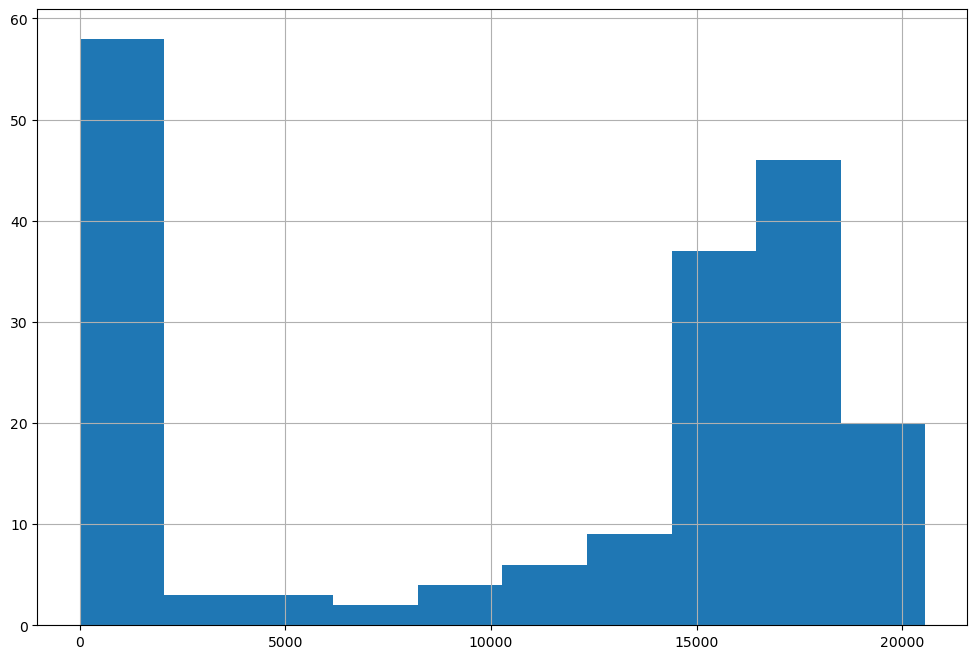

In [7]:
austria_confirmed_cases.hist(figsize=(12, 8))
plt.show()

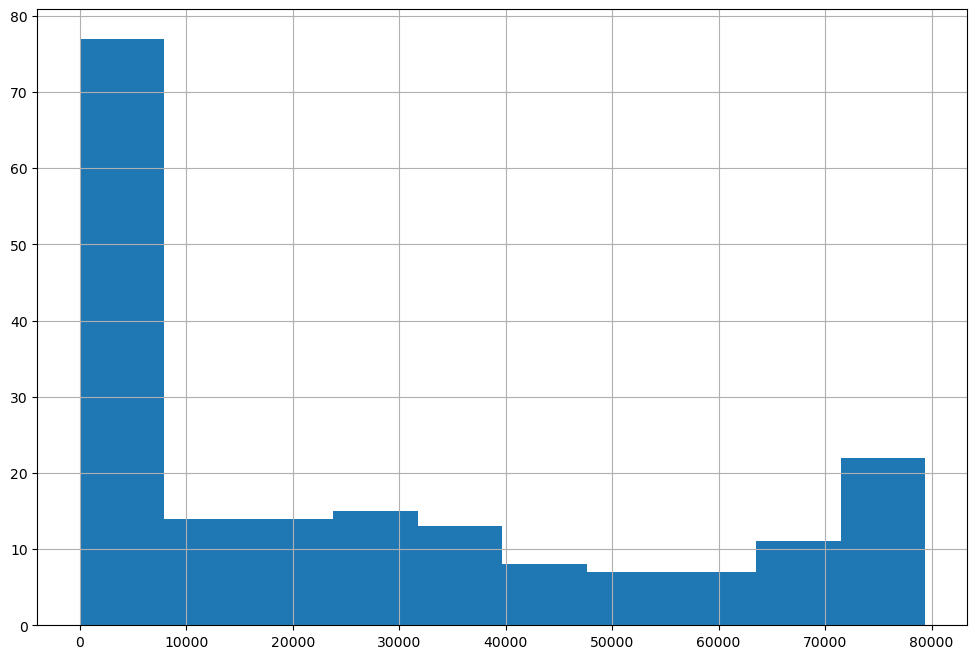

In [8]:
sweden_confirmed_cases.hist(figsize=(12, 8))
plt.show()

<h3>Застосуємо згладжування за допомогою ковзаючого середнього</h3>

In [9]:
# Для кращої візуалізації властивостей ряду (трендів, сезонності тощо)
# застосуємо згладжування за допомогою ковзаючого середнього:
def plot_moving_average(series, n):
    rolling_mean = series.rolling(window=n).mean()
    plt.figure(figsize=(15, 5))
    plt.title(f'Moving average\n window size = {n}')
    plt.plot(rolling_mean, c='orange', label='Rolling mean trend')
    plt.plot(series[n:], label='Actual values')
    plt.legend(loc='upper left')
    plt.grid(True)

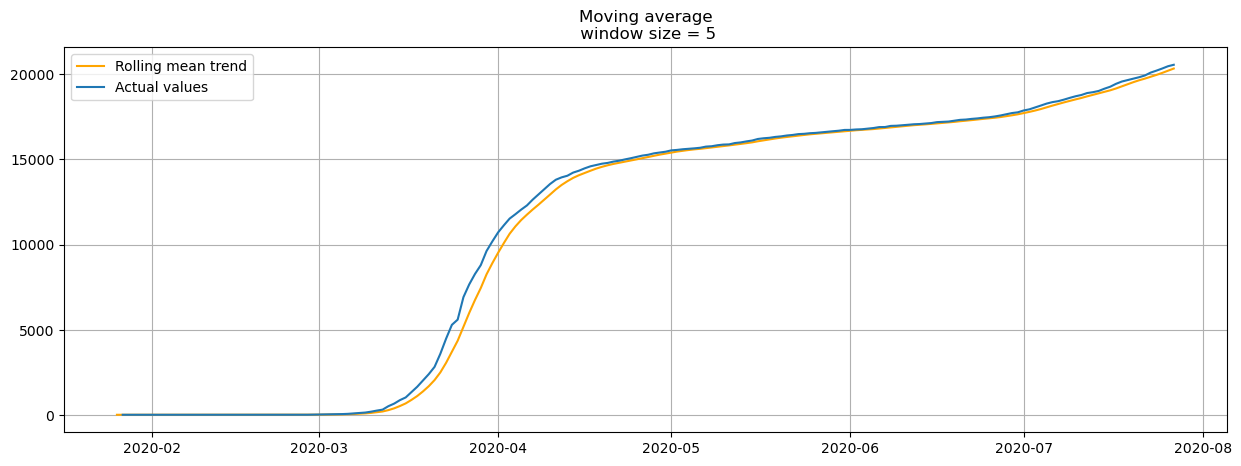

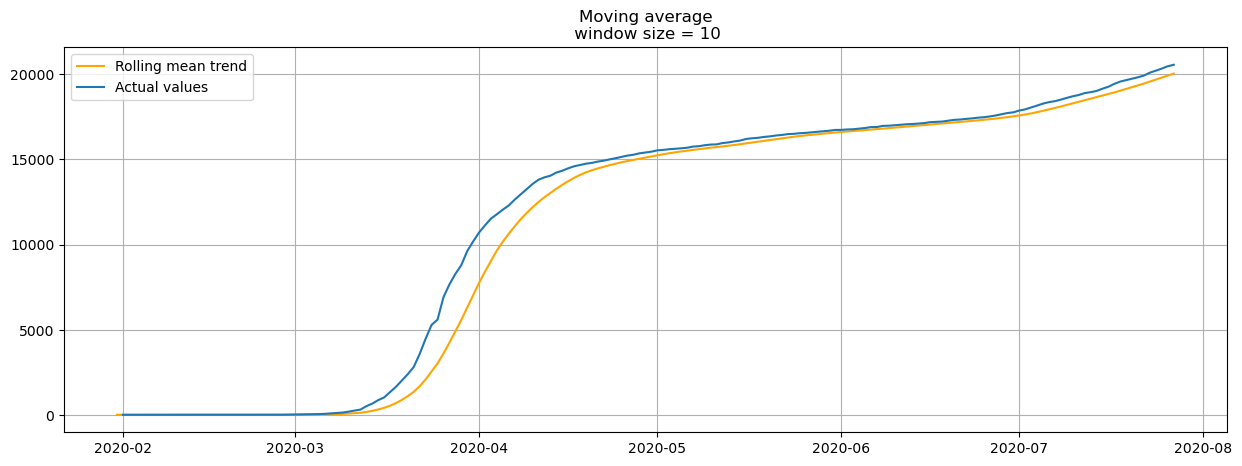

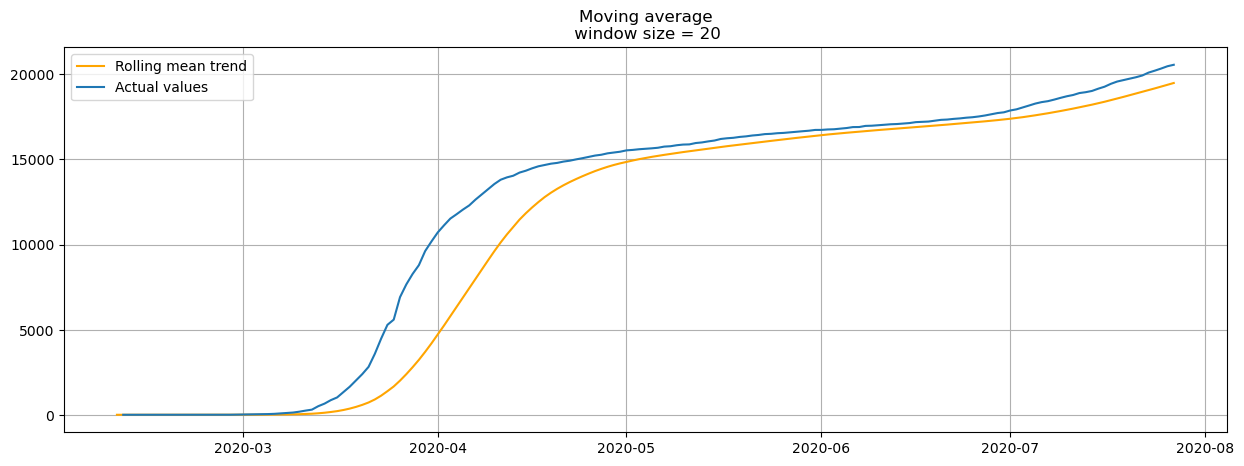

In [10]:
plot_moving_average(austria_confirmed_cases, 5)
plot_moving_average(austria_confirmed_cases, 10)
plot_moving_average(austria_confirmed_cases, 20)

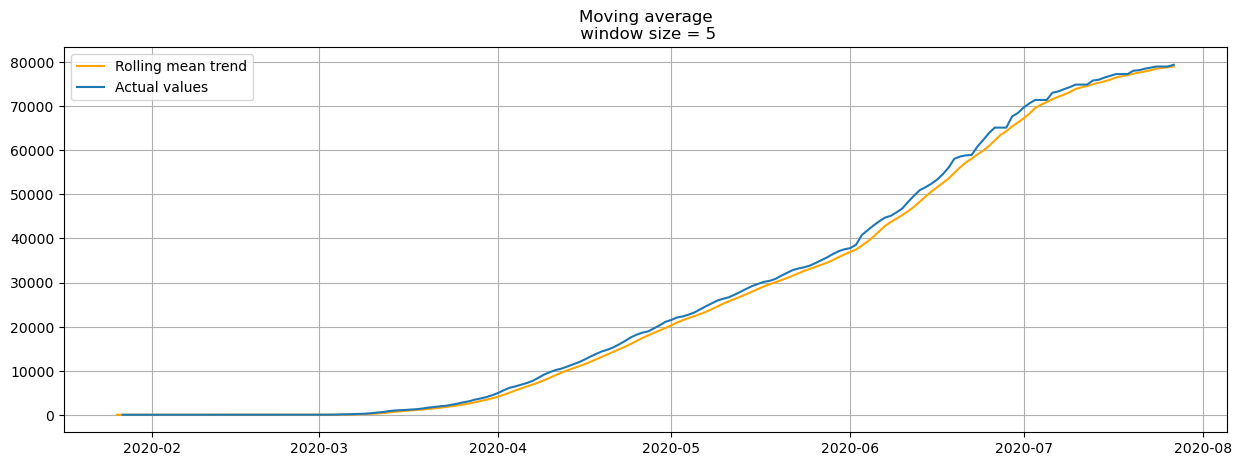

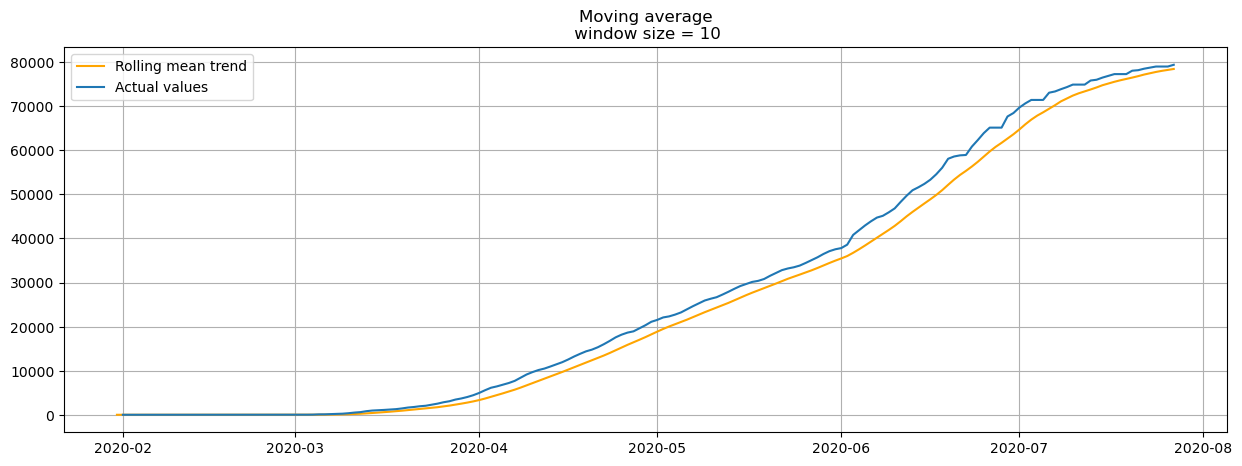

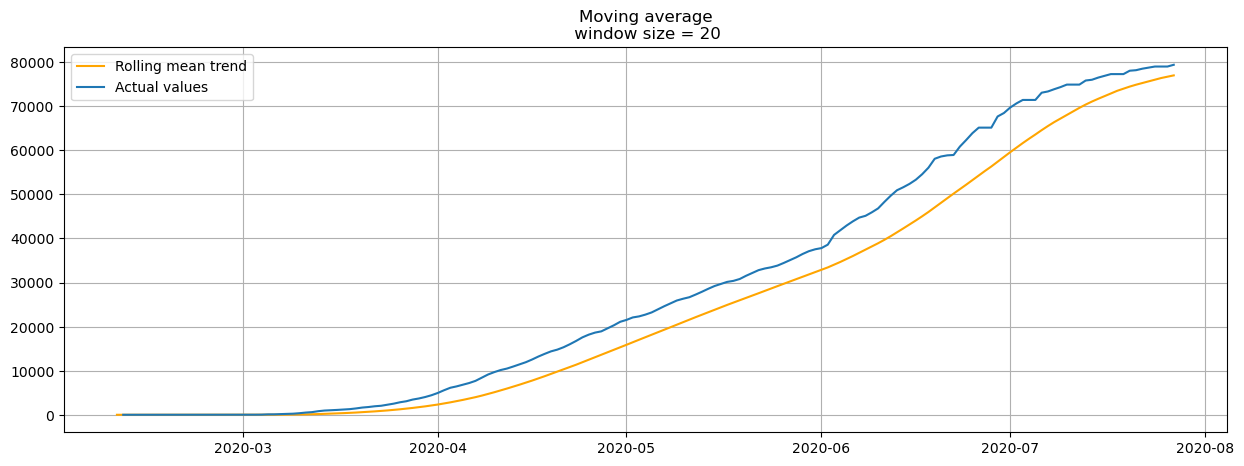

In [11]:
plot_moving_average(sweden_confirmed_cases, 5)
plot_moving_average(sweden_confirmed_cases, 10)
plot_moving_average(sweden_confirmed_cases, 20)

<h3>Візуалізуємо декомпозицію ряду на тренд, сезонність та залишки</h3>

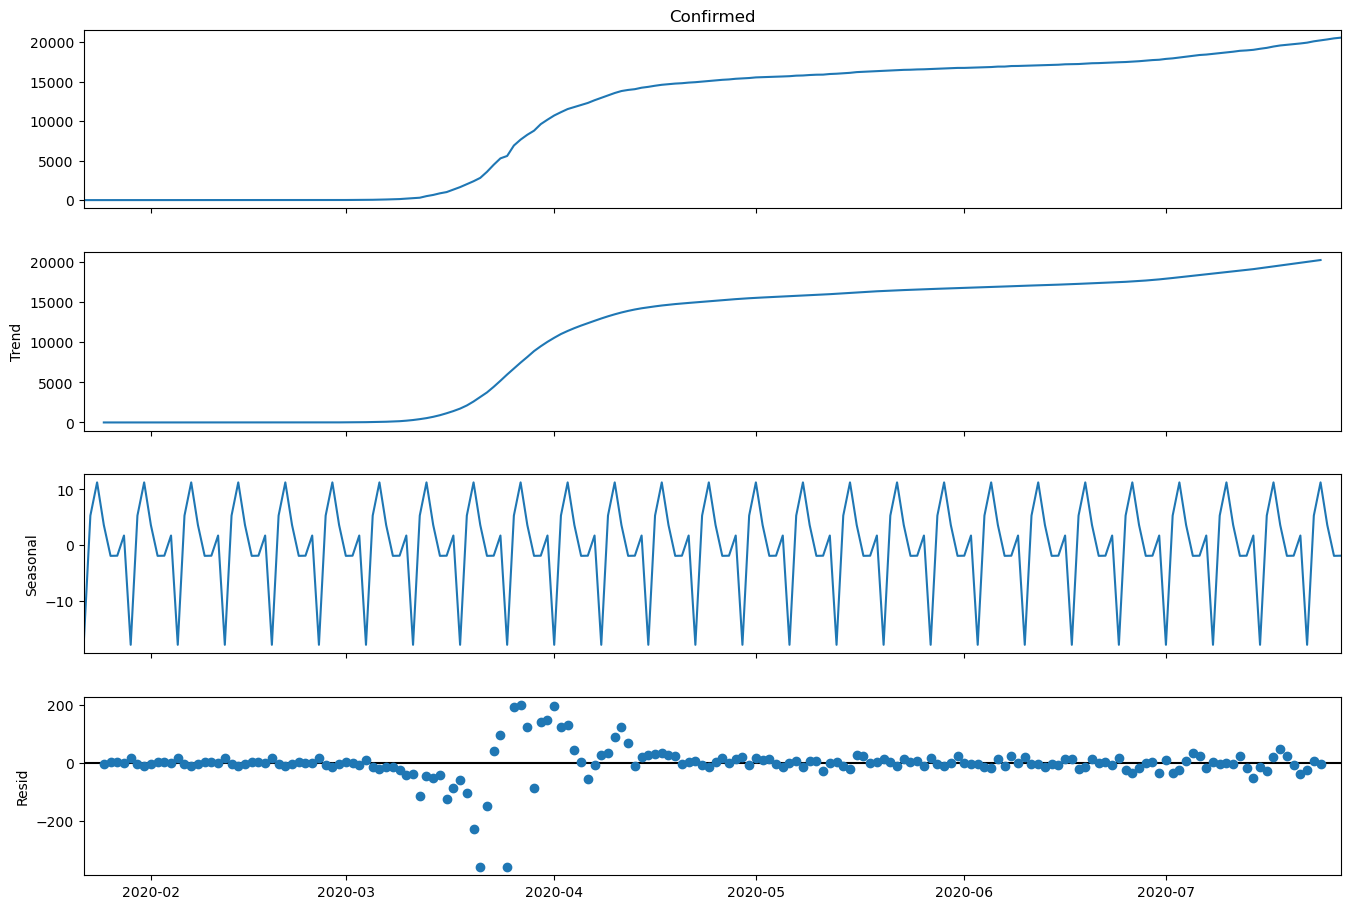

In [12]:
# Візуалізуємо декомпозицію ряду на тренд, сезонність та залишки для Австрії:
decomposition = smt.seasonal_decompose(austria_confirmed_cases[~austria_confirmed_cases.isna()])
fig = decomposition.plot()

fig.set_size_inches(15, 10)

plt.show()

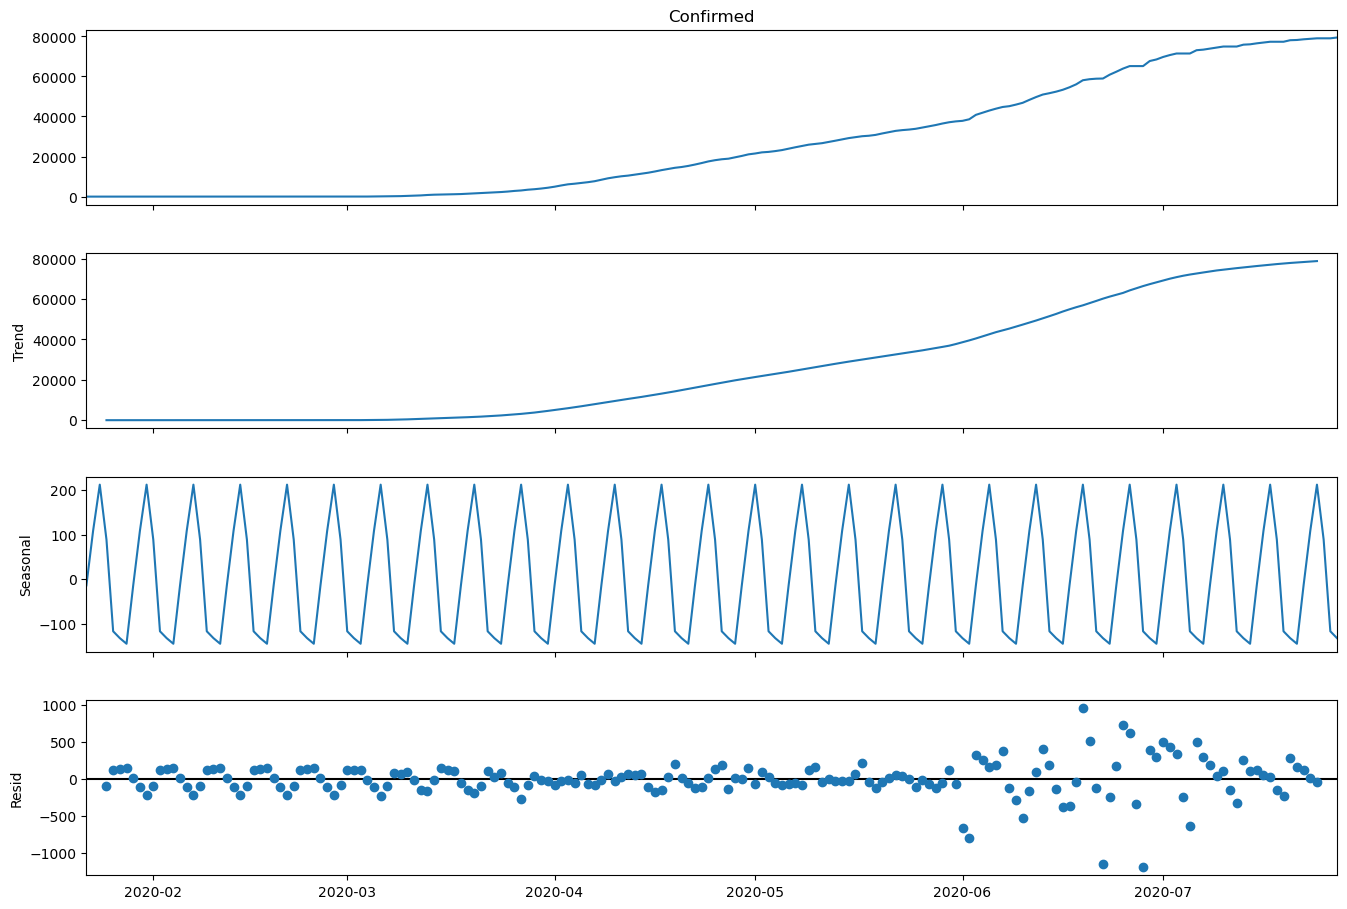

In [13]:
# Візуалізуємо декомпозицію ряду на тренд, сезонність та залишки для Швеції:
decomposition = smt.seasonal_decompose(sweden_confirmed_cases[~sweden_confirmed_cases.isna()])
fig = decomposition.plot()

fig.set_size_inches(15, 10)

plt.show()

<h3>Будуємо графіки автокореляції та часткової автокореляції</h3>

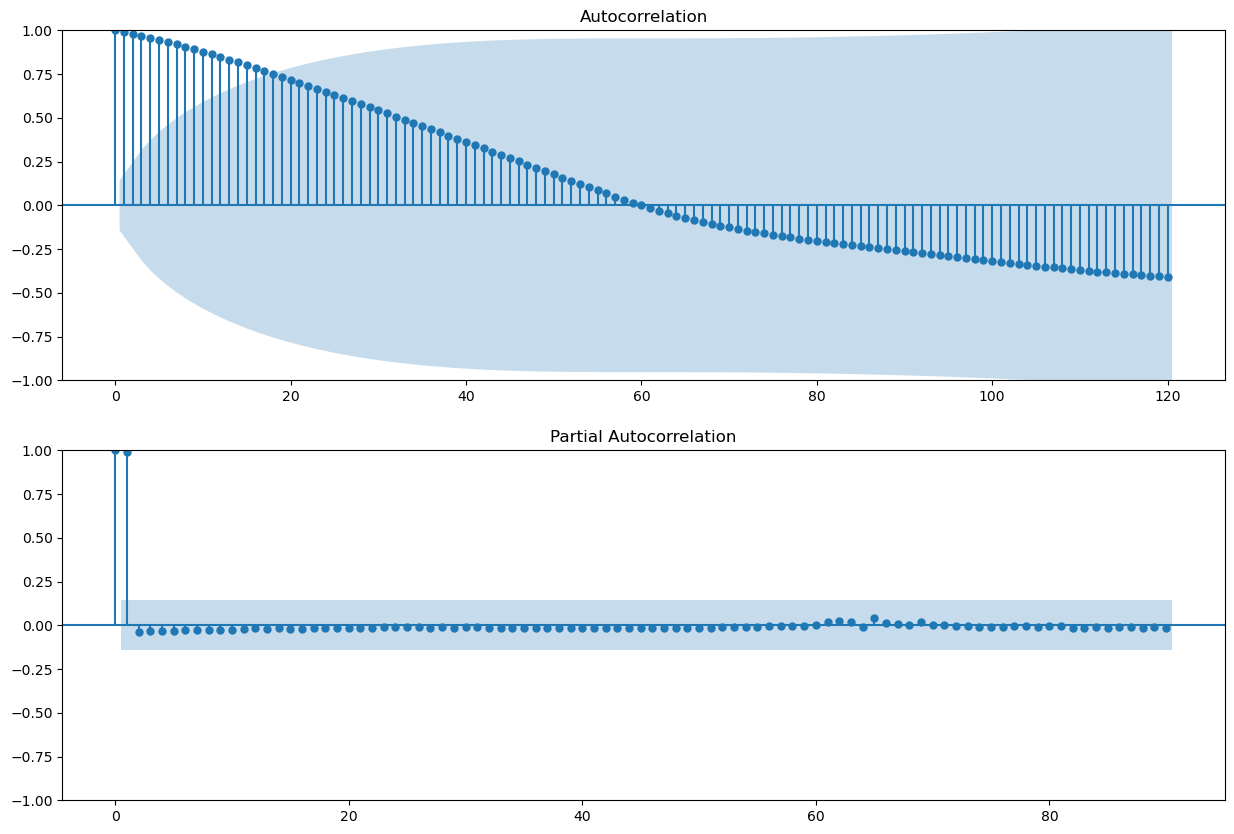

In [14]:
# Будуємо графіки автокореляції та часткової автокореляції для Австрії:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(austria_confirmed_cases.dropna(), ax=ax[0], lags=120)
ax[1] = plot_pacf(austria_confirmed_cases[~austria_confirmed_cases.isna()], ax=ax[1], lags=90)

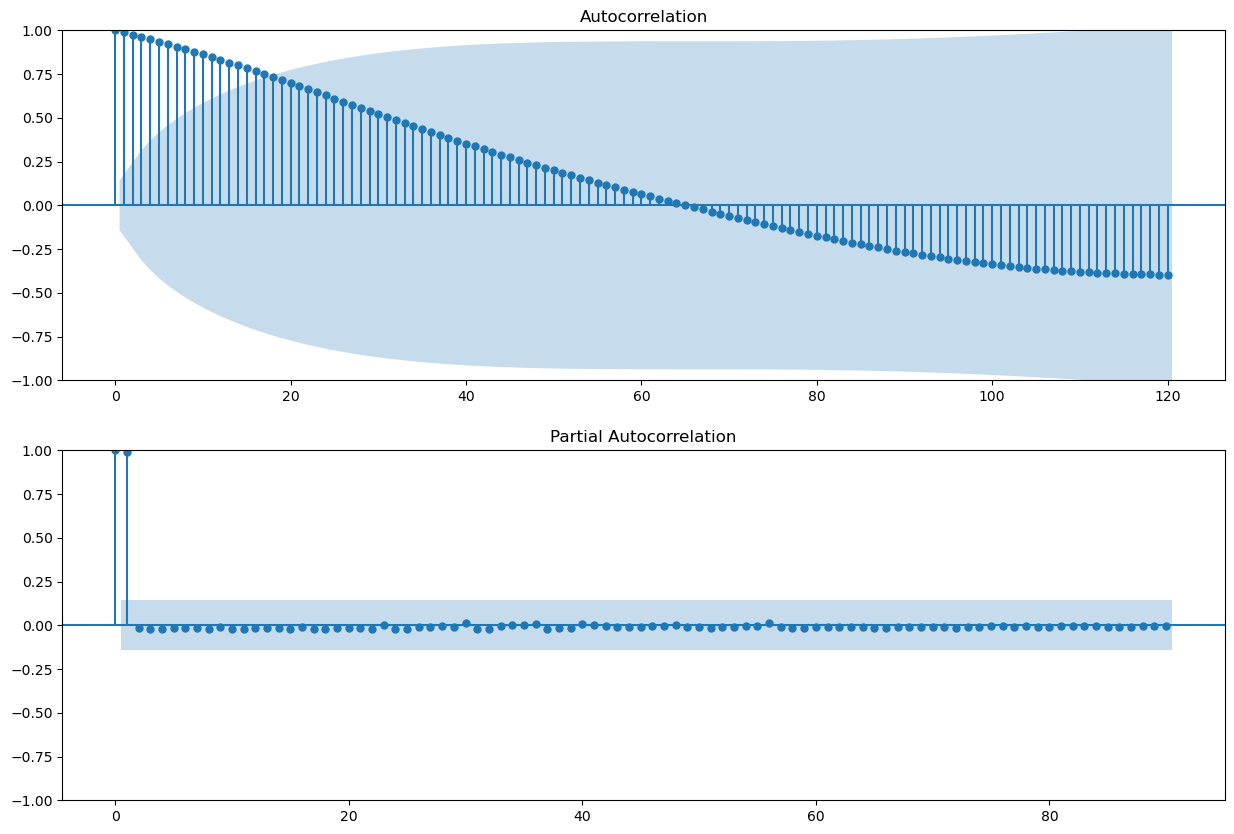

In [15]:
# Будуємо графіки автокореляції та часткової автокореляції для Швеції:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(sweden_confirmed_cases[~sweden_confirmed_cases.isna()], ax=ax[0], lags=120)
ax[1] = plot_pacf(sweden_confirmed_cases[~sweden_confirmed_cases.isna()], ax=ax[1], lags=90)

<h3>Перевіримо ряд на стаціонарність</h3>

In [16]:
# Перевіримо ряд на стаціонарність за допомогою доповненого тесту Дікі-Фуллера:
def dickey_fuller_test(series):
    test = smt.adfuller(series, autolag='AIC')
    print('adf: ', test[0])
    print('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0] > test[4]['5%']: 
        print('Навні одиничні корені, ряд не стаціонарний.')
    else:
        print('Одиничні корені відсутні, ряд є стаціонарним.')

        
print("Для Австрі:")
dickey_fuller_test(austria_confirmed_cases[~austria_confirmed_cases.isna()])

print("\nДля Швеції:")
dickey_fuller_test(sweden_confirmed_cases[~sweden_confirmed_cases.isna()])

Для Австрі:
adf:  -1.1259454653453989
p-value:  0.7046150443792543
Critical values:  {'1%': -3.4672111510631, '5%': -2.877734766803841, '10%': -2.575403364197531}
Навні одиничні корені, ряд не стаціонарний.

Для Швеції:
adf:  -1.5906645538419313
p-value:  0.4882813176127041
Critical values:  {'1%': -3.4680615871598537, '5%': -2.8781061899535128, '10%': -2.5756015922004134}
Навні одиничні корені, ряд не стаціонарний.


<h3>Будуємо матрицю кореляцій</h3>

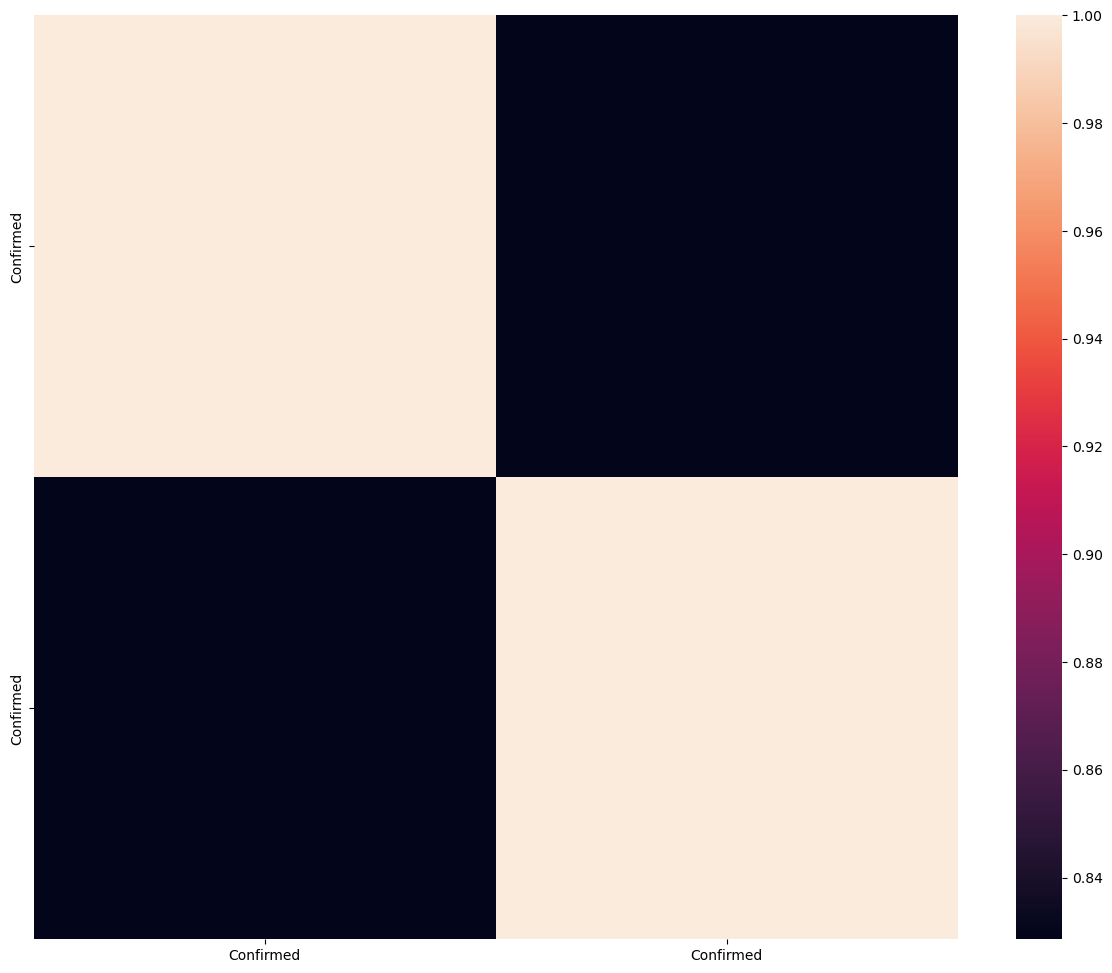

In [17]:
austria_sweden_df = pd.concat([austria_confirmed_cases, sweden_confirmed_cases], axis=1)
covid_corrmat = austria_sweden_df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(covid_corrmat, square=True)
plt.show()


<h1>Частина 2</h1>

<h3>Зчитуємо датасет з трендом по обміну валют</h3>

<p>Dataset: <a href="https://bank.gov.ua/ua/markets/exchangerate-chart">https://bank.gov.ua/ua/markets/exchangerate-chart</a></p>


In [18]:
currencies_df = pd.read_csv('data/exchange.csv')#, index_col=['Date'], parse_dates=['Date']
#, index_col=['Дата'], parse_dates=['Дата']
currencies_df.sort_index(inplace=True)

currencies_df

,Дата,Час,Код цифровий,Код літерний,Кількість одиниць,Назва валюти,"Офіційний курс гривні, грн"
0,10.05.2021,0.0,840,USD,1,Долар США,27.7205
1,11.05.2021,0.0,840,USD,1,Долар США,27.7641
2,12.05.2021,0.0,840,USD,1,Долар США,27.6744
3,13.05.2021,0.0,840,USD,1,Долар США,27.6318
4,14.05.2021,0.0,840,USD,1,Долар США,27.6273
...,...,...,...,...,...,...,...
1095,09.05.2024,0.0,840,USD,1,Долар США,39.3828
1096,10.05.2024,0.0,840,USD,1,Долар США,39.5518
1097,11.05.2024,0.0,840,USD,1,Долар США,39.5518
1098,12.05.2024,0.0,840,USD,1,Долар США,39.5518


In [19]:
headers = ["Date", "Time", "NumericalCode", "Code", "Amount", "Name", "Price"]
currencies_df.columns = headers
currencies_df

,Date,Time,NumericalCode,Code,Amount,Name,Price
0,10.05.2021,0.0,840,USD,1,Долар США,27.7205
1,11.05.2021,0.0,840,USD,1,Долар США,27.7641
2,12.05.2021,0.0,840,USD,1,Долар США,27.6744
3,13.05.2021,0.0,840,USD,1,Долар США,27.6318
4,14.05.2021,0.0,840,USD,1,Долар США,27.6273
...,...,...,...,...,...,...,...
1095,09.05.2024,0.0,840,USD,1,Долар США,39.3828
1096,10.05.2024,0.0,840,USD,1,Долар США,39.5518
1097,11.05.2024,0.0,840,USD,1,Долар США,39.5518
1098,12.05.2024,0.0,840,USD,1,Долар США,39.5518


<h3>Будуємо динаміку ціни за останні 3 роки.</h3>

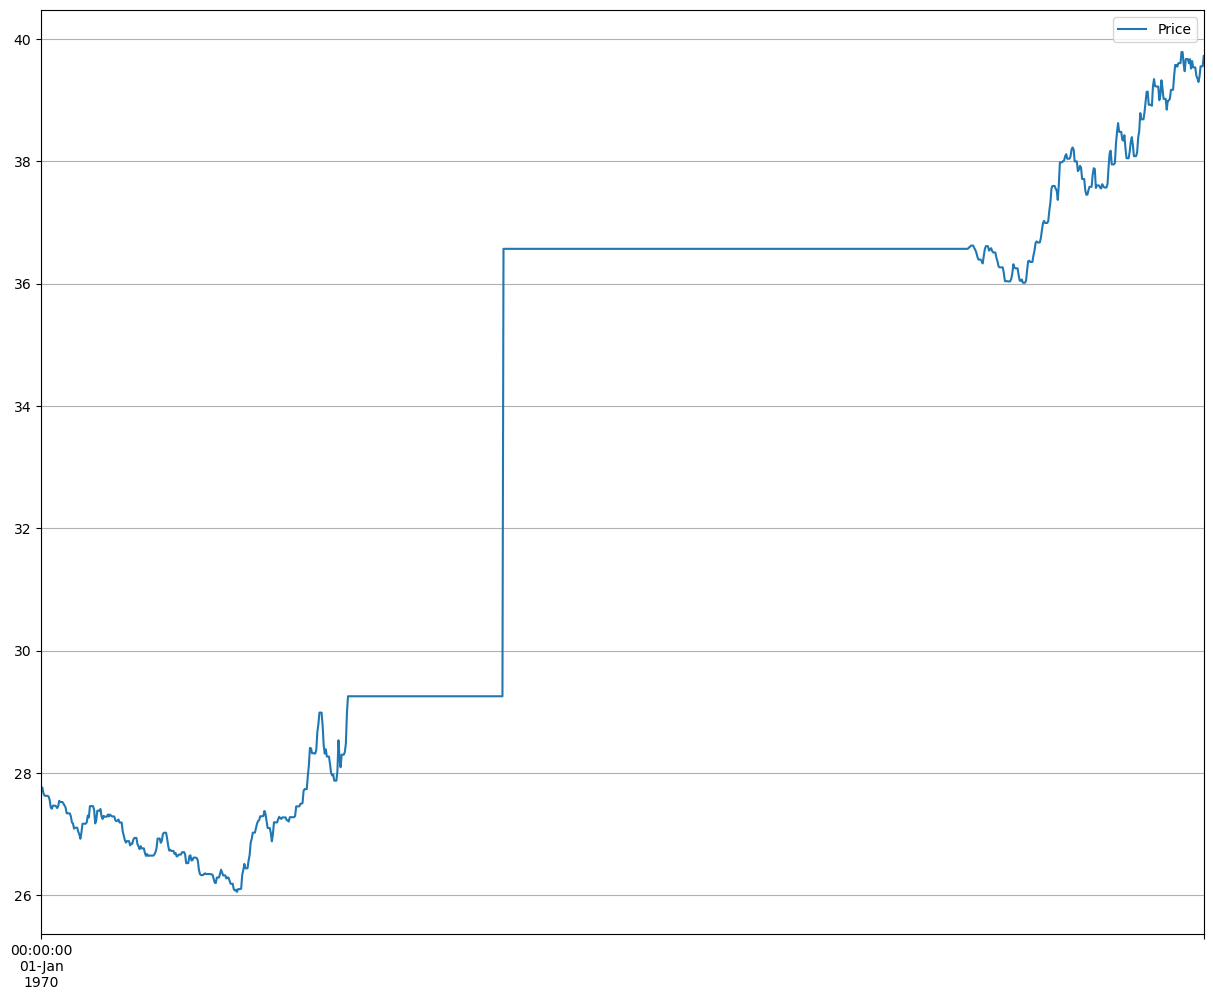

In [20]:
rate_df = currencies_df[['Price']]
rate_df.index = pd.to_datetime(rate_df.index, dayfirst=True)

fig, ax = plt.subplots(figsize=(15, 12))
rate_df.plot(ax=ax, subplots=True)
ax.grid()
plt.show()

<h3>Використовуємо згладжування для дослідження характеристик рядів</h3>

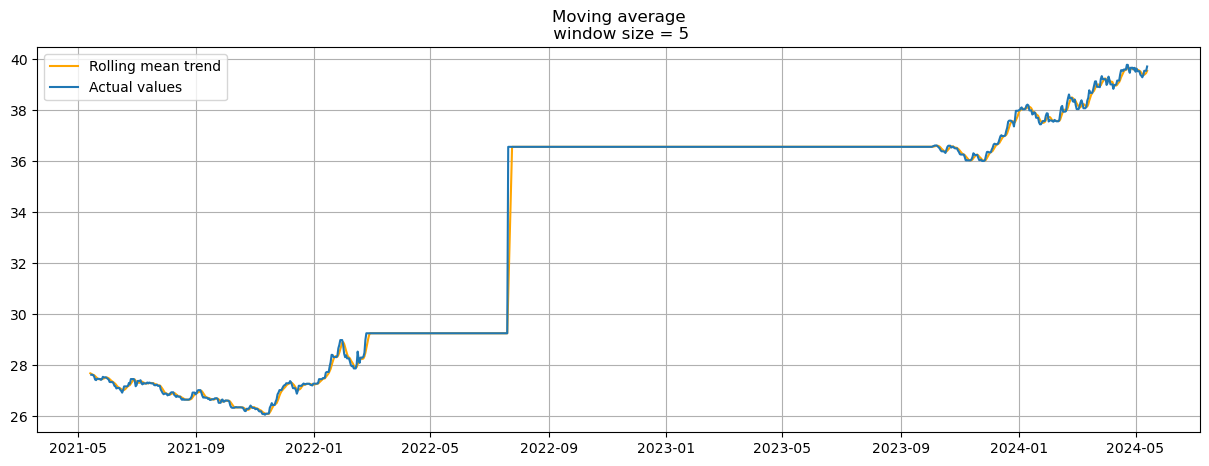

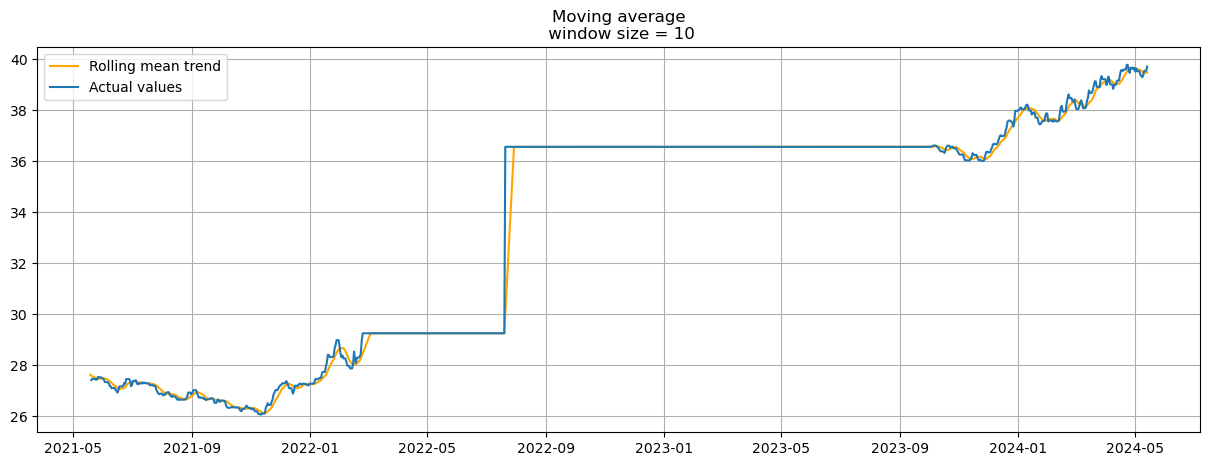

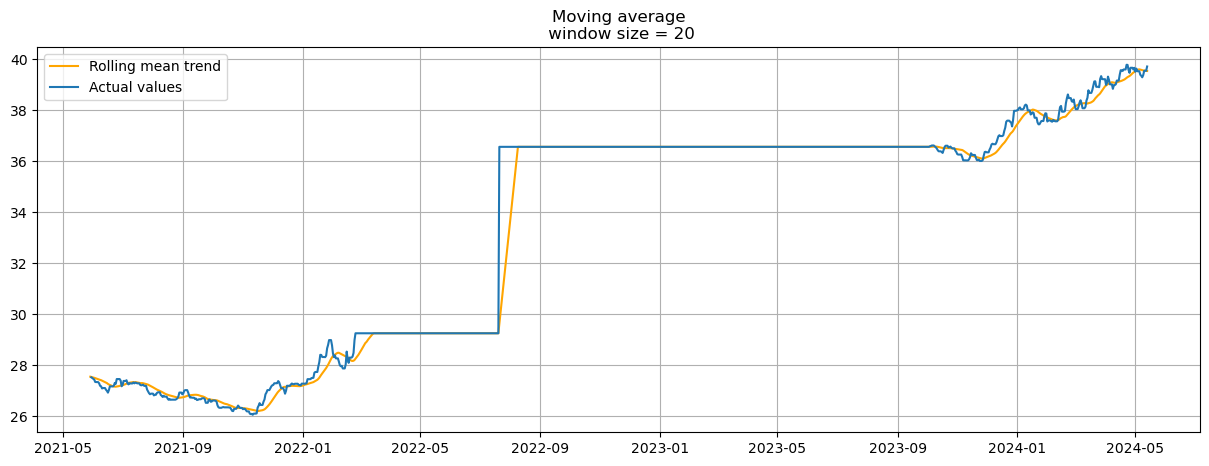

In [21]:
def plot_moving_average(series, n):
    rolling_mean = series.rolling(window=n).mean()
    plt.figure(figsize=(15, 5))
    plt.title(f'Moving average\n window size = {n}')
    plt.plot(rolling_mean, c='orange', label='Rolling mean trend')
    plt.plot(series[n:], label='Actual values')
    plt.legend(loc='upper left')
    plt.grid(True)
    
df_curr = currencies_df.copy()  # Make a copy of the DataFrame to avoid modifying the original one
df_curr['Date'] = pd.to_datetime(df_curr['Date'], format='%d.%m.%Y')  # Convert the 'Date' column to datetime
df_curr.set_index('Date', inplace=True)  # Set the datetime index

plot_moving_average(df_curr['Price'], 5)
plot_moving_average(df_curr['Price'], 10)
plot_moving_average(df_curr['Price'], 20)



<h3>Створюємо декомпозицію ціни на тренд, сезонність і залишки</h3>

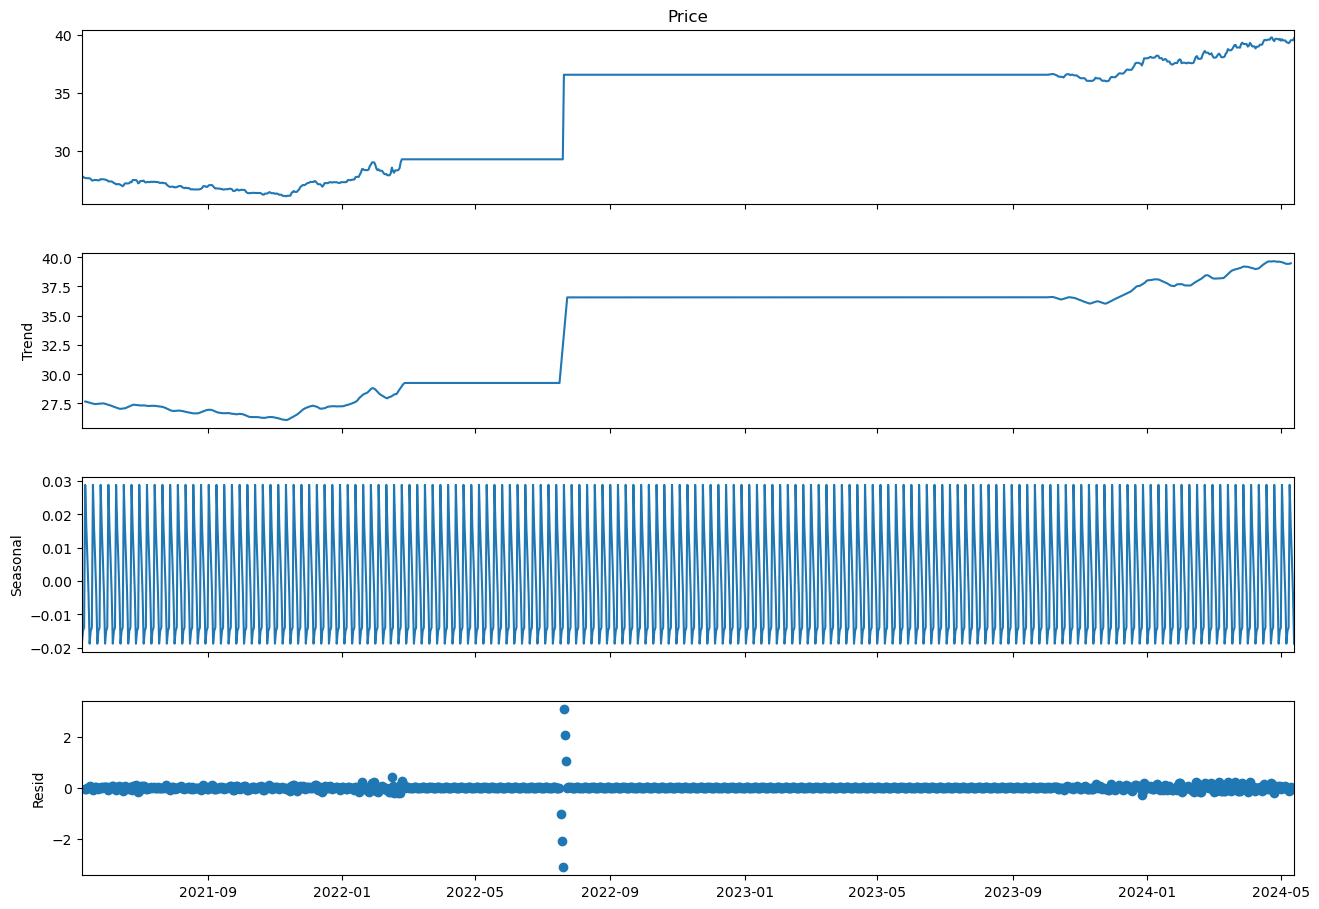

In [22]:
price_decomposition = smt.seasonal_decompose(df_curr['Price'])

fig = price_decomposition.plot()

fig.set_size_inches(15, 10)

plt.show()

<h3>Будуємо графіки автокореляції та часткової автокореляції</h3>

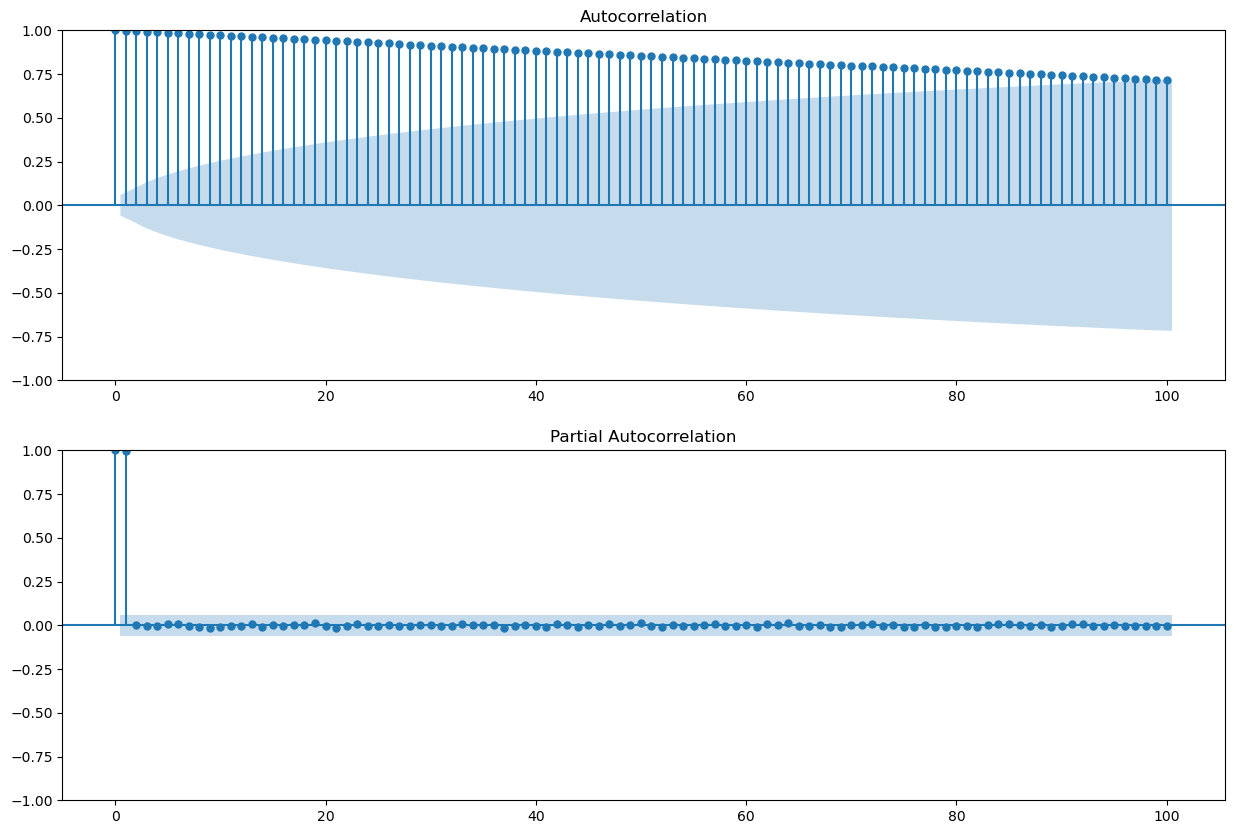

In [23]:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(df_curr['Price'], ax=ax[0], lags=100)
ax[1] = plot_pacf(df_curr['Price'], ax=ax[1], lags=100)

<h3>Перевіримо ряд на стаціонарність</h3>

In [24]:
dickey_fuller_test(df_curr['Price'])

adf:  -0.7059070066896391
p-value:  0.8452135511611268
Critical values:  {'1%': -3.4363141853066232, '5%': -2.864173472014944, '10%': -2.568172143730631}
Навні одиничні корені, ряд не стаціонарний.


<h3>Зробимо ряд стаціонарним, використавши різницю</h3>

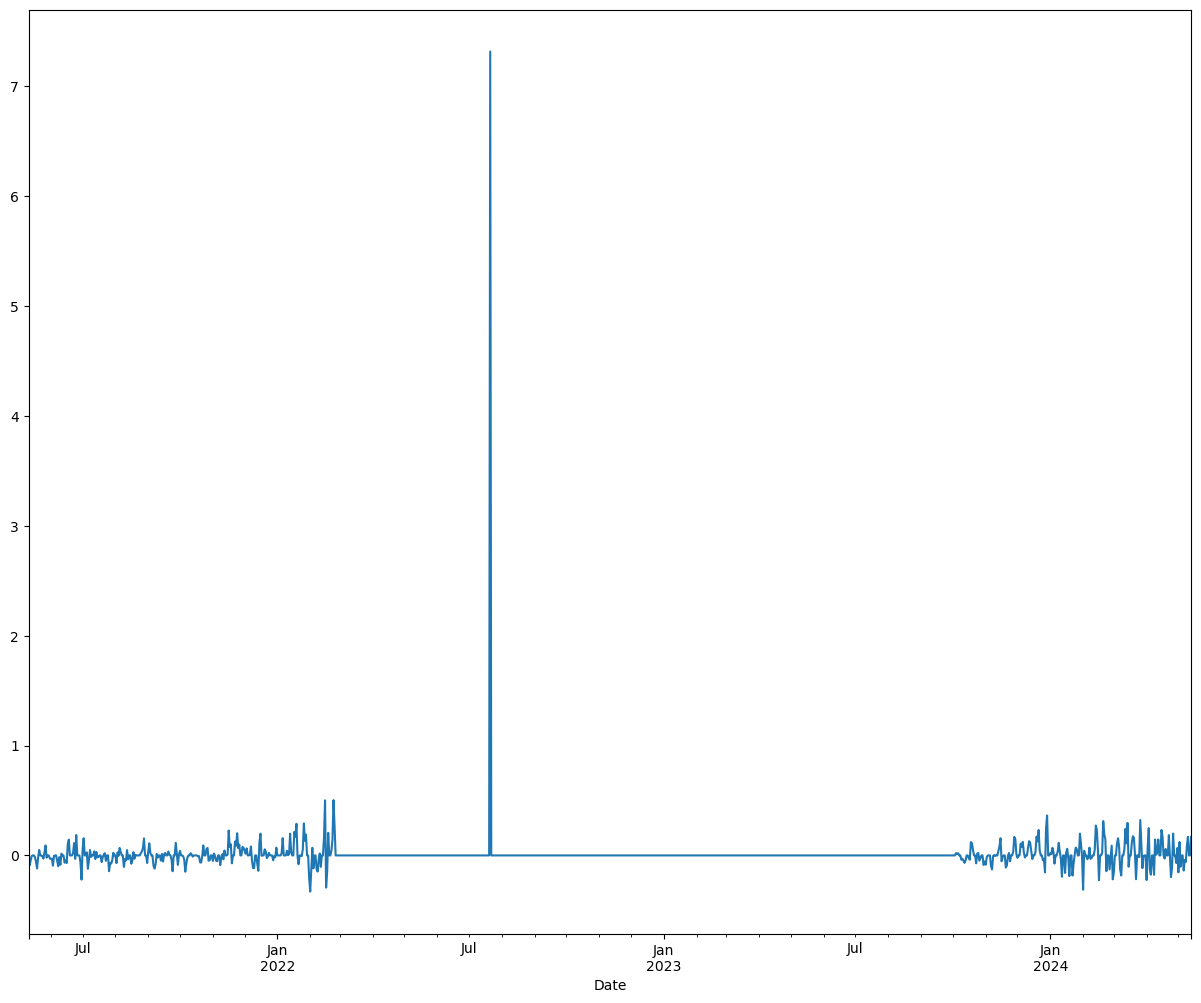

In [25]:
currencies_price_df_diff = df_curr['Price'].diff(periods=1).dropna()
fig, ax = plt.subplots(figsize=(15, 12))

currencies_price_df_diff.plot(ax=ax)

plt.show()

<p>Повторно перевіримо стаціонарність ряду:</p>

In [26]:
dickey_fuller_test(currencies_price_df_diff)

adf:  -32.44180432214572
p-value:  0.0
Critical values:  {'1%': -3.436319629947604, '5%': -2.8641758736917784, '10%': -2.56817342284863}
Одиничні корені відсутні, ряд є стаціонарним.


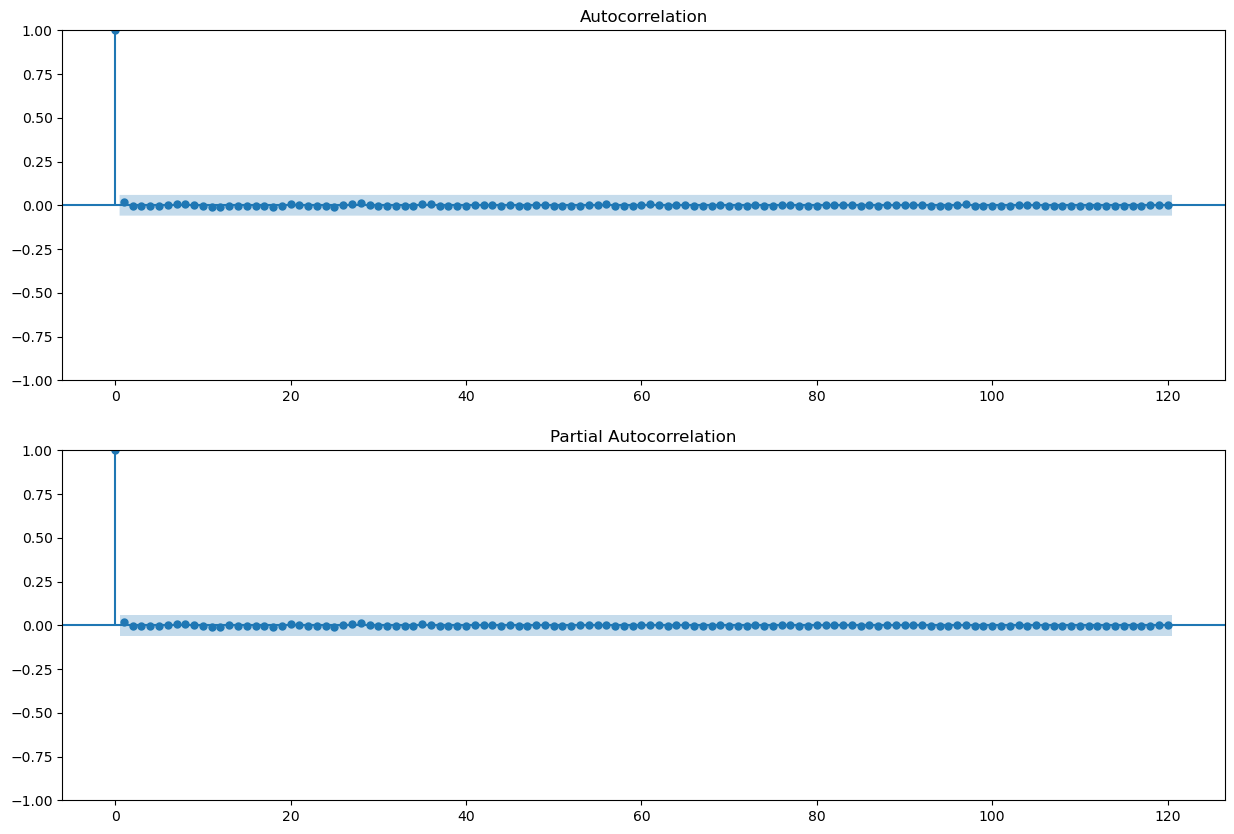

In [27]:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(currencies_price_df_diff, ax=ax[0], lags=120)
ax[1] = plot_pacf(currencies_price_df_diff, ax=ax[1], lags=120)

<h3>Побудуємо модель <b><i>ARIMA</i></b> для прогнозу значення ціни на тиждень вперед</h3>


In [28]:
train_data = currencies_df['Price'][:-7]
model = smt.ARIMA(train_data, order=(1, 1, 1)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 1093
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  51.993
Date:                Mon, 30 Sep 2024   AIC                            -97.986
Time:                        15:05:36   BIC                            -82.999
Sample:                             0   HQIC                           -92.314
                               - 1093                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1572      7.692     -0.020      0.984     -15.234      14.919
ma.L1          0.1793      7.693      0.023      0.981     -14.898      15.256
sigma2         0.0532      0.000    502.177      0.000       0.053       0.053
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          38689694.86
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            29.16
Prob(H) (two-sided):                  0.39   Kurtosis:                       923.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
pred = model.predict(currencies_df['Price'].index[-7], currencies_df['Price'].index[-1])
test_data = currencies_price_df_diff[-7:]

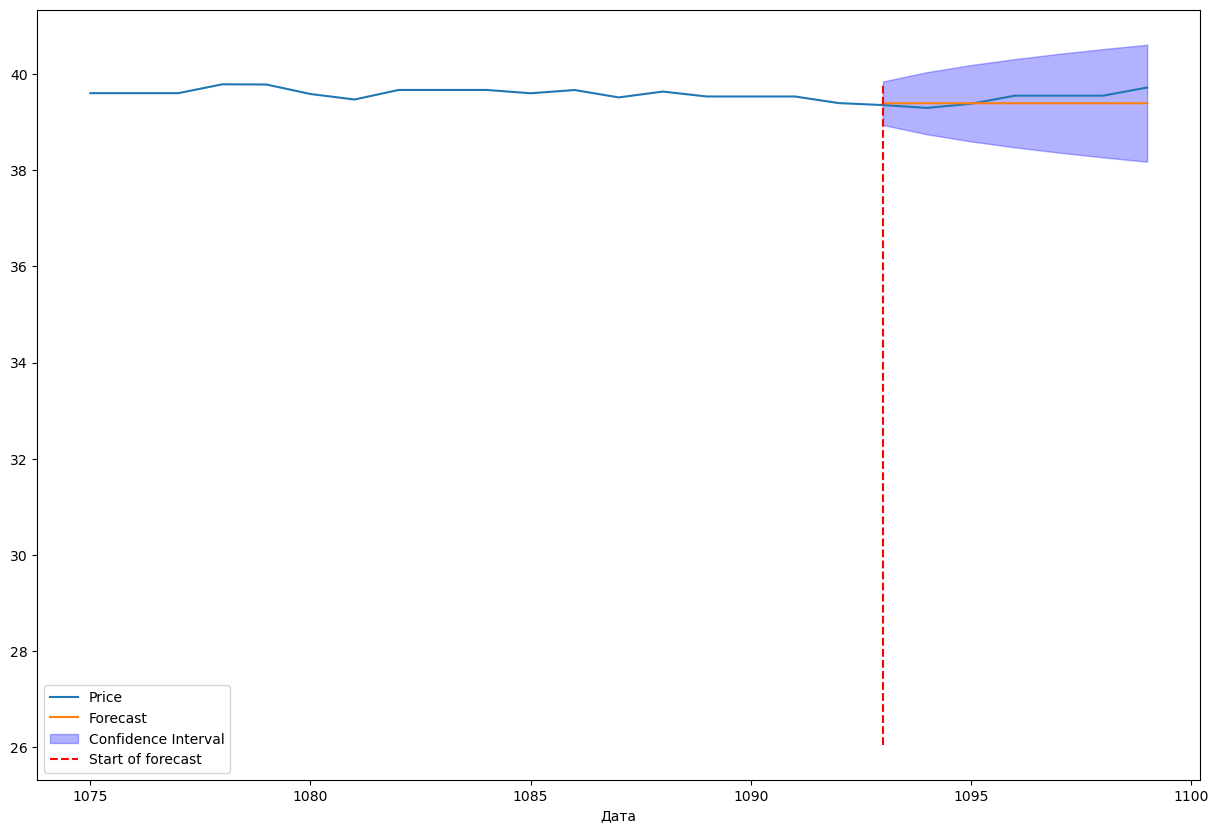

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))

# Побудова графіка цін
currencies_df['Price'][-25:].plot(ax=ax)

# Побудова графіка прогнозу
forecast = model.predict(currencies_df['Price'].index[-7], 
                         currencies_df['Price'].index[-1], 
                         dynamic=True)
ax.plot(forecast.index, forecast, label='Forecast')

# Отримання верхньої та нижньої меж довірчого інтервалу
forecast_ci = model.get_forecast(steps=7).conf_int()
lower_ci = forecast_ci.iloc[:, 0]
upper_ci = forecast_ci.iloc[:, 1]

# Побудова довірчих інтервалів
ax.fill_between(forecast_ci.index, lower_ci, upper_ci, color='blue', alpha=0.3)

# Додавання вертикальної лінії для позначення початку прогнозу
min_price = currencies_df['Price'].min()
max_price = currencies_df['Price'].max()
ax.vlines(currencies_df['Price'].index[-7], 
          min_price, max_price, linestyle='--', color='r', label='Start of forecast')

plt.xlabel('Дата')
# Додавання підпису для початку прогнозу
ax.legend(["Price", "Forecast", "Confidence Interval", "Start of forecast"])

plt.show()


<h3>Оцінка точності прогнозу</h3>

In [34]:
test_data = currencies_df['Price'][-7:]
last_pred = pred[-7:]  # Вибираємо лише останні 7 прогнозованих значень
mae = mean_absolute_error(test_data, last_pred)
rmse = mean_squared_error(test_data, last_pred, squared=False)
print(f'Середня абсолютна помилка: {mae:.2f}')
print(f'Корінь з середнього квадратичного відхилення: {rmse:.2f}')


Середня абсолютна помилка: 0.14
Корінь з середнього квадратичного відхилення: 0.17


C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<h1>Додаткове завдання</h1>

<p>
    <ol>
    <li>Визначити, чи є сезонна компонента в кількості опадів в Сіетлі (файл seattleWeather_1948-2017.csv).</li>
    <li>Градуси перевести в Цельсії.</li> 
    <li>Чи є кореляція між температурою та опадами?</li> 
    <li>Скласти прогноз опадів на 2018 рік, оцінити точність прогнозу</li>
    </ol>
</p>

In [35]:
w_df = pd.read_csv('data/seattleWeather_1948-2017.csv', encoding='utf-8')
w_df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [36]:
# Перетворення градусів Фаренгейта в Цельсії
w_df['TMAX'] = (w_df['TMAX'] - 32) * 5.0/9.0
w_df['TMIN'] = (w_df['TMIN'] - 32) * 5.0/9.0

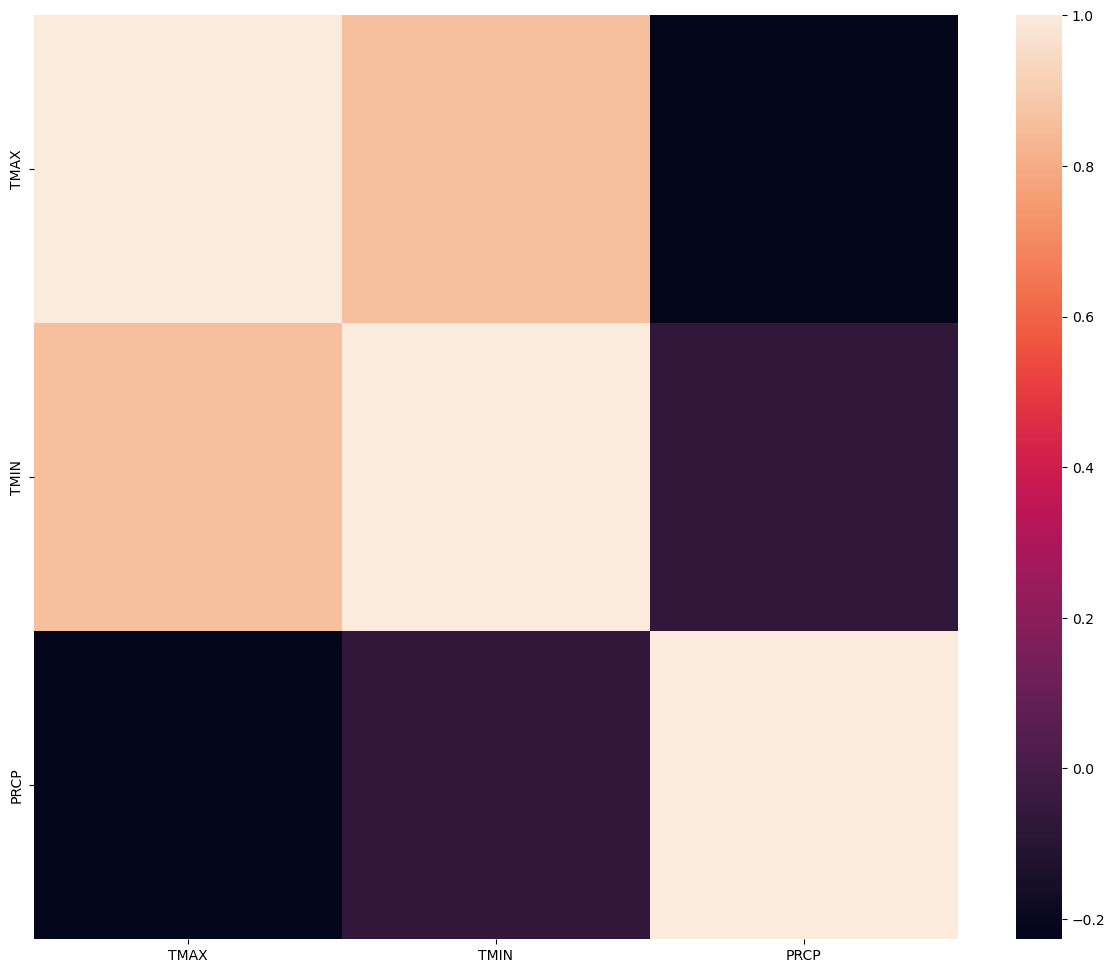

,TMAX,TMIN,PRCP
TMAX,1.000000,0.860684,-0.226736
TMIN,0.860684,1.000000,-0.064365
PRCP,-0.226736,-0.064365,1.000000


In [37]:
# Будуємо матрицю кореляцій для температур і опадів:
df_corr = w_df[['TMAX', 'TMIN', 'PRCP']].corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df_corr, square=True)
plt.show()
df_corr

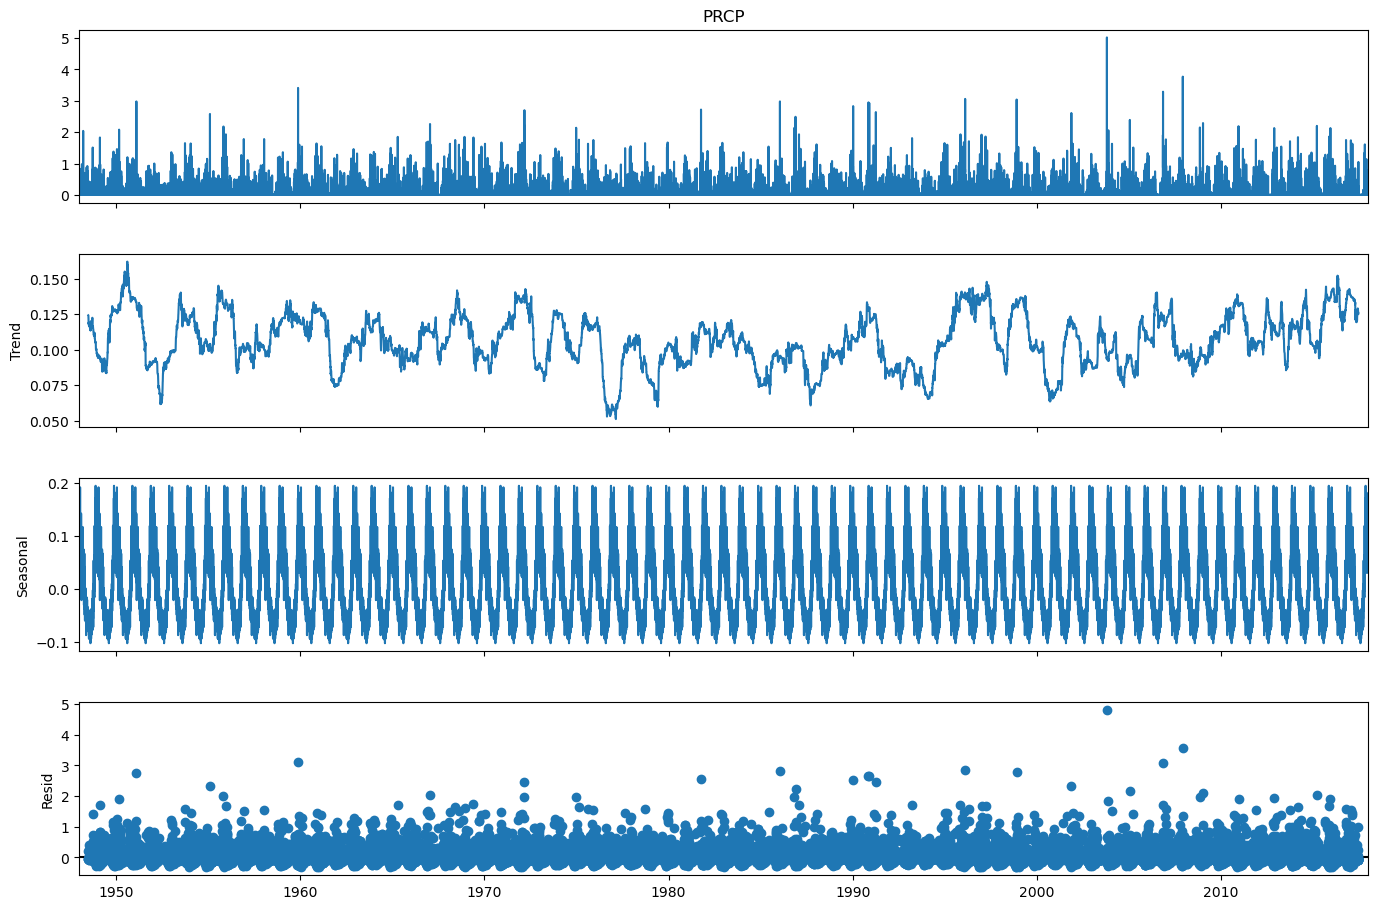

In [38]:
# Візуалізуємо декомпозицію ряду на тренд, сезонність та залишки, перевіримо ряд на сезонність

# Перетворимо стовпець 'DATE' в індекс типу DatetimeIndex
w_df['DATE'] = pd.to_datetime(w_df['DATE'])
w_df.set_index('DATE', inplace=True)

# Візуалізуємо декомпозицію ряду на тренд, сезонність та залишки
decomposition = sm.tsa.seasonal_decompose(w_df['PRCP'].fillna(w_df['PRCP'].mean()), period=365)
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()

In [39]:
# Будуємо модель ARIMA для прогнозування на рік вперед
train_data = w_df['PRCP'][:-365]
model = smt.ARIMA(train_data, order=(1, 1, 1)).fit()
model.summary()

C:\Users\oksan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\oksan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\oksan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PRCP   No. Observations:                25186
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1796.079
Date:                Mon, 30 Sep 2024   AIC                          -3586.157
Time:                        15:06:39   BIC                          -3561.755
Sample:                    01-01-1948   HQIC                         -3578.262
                         - 12-14-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2446      0.003     70.528      0.000       0.238       0.251
ma.L1         -0.9664      0.002   -642.813      0.000      -0.969      -0.964
sigma2         0.0508      0.000    430.408      0.000       0.051       0.051
===================================================================================
Ljung-Box (L1) (Q):                   1.00   Jarque-Bera (JB):           1279520.69
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             4.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

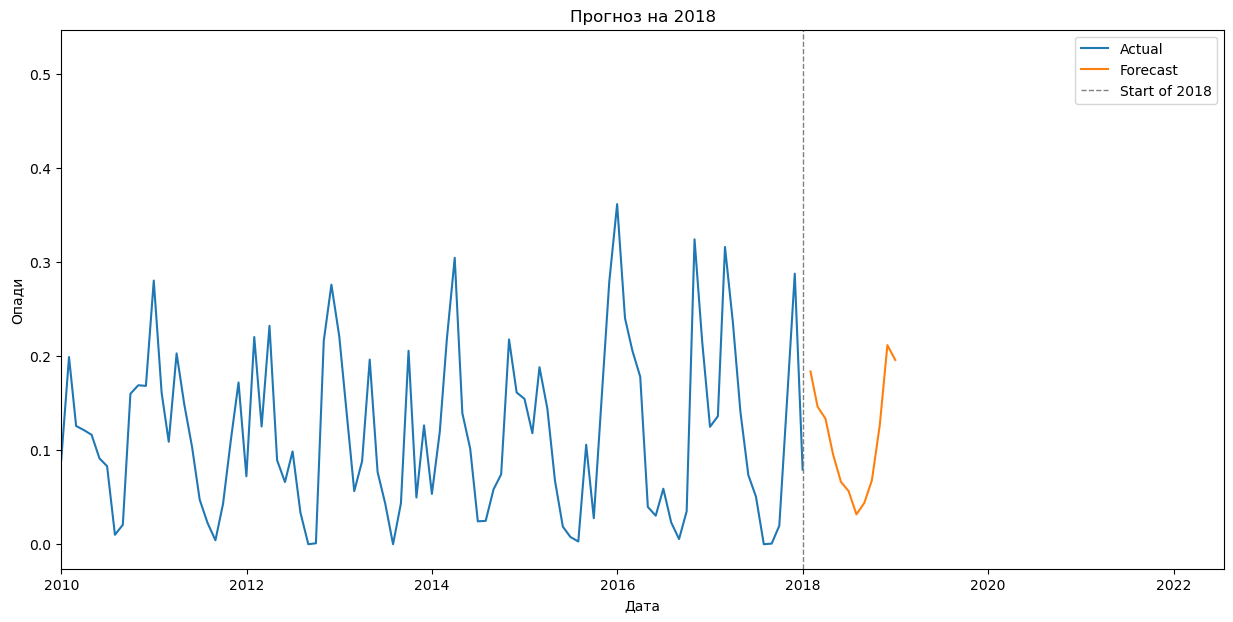

In [40]:
# Згрупуємо дані по місяцях і знайдемо середнє значення опадів за кожен місяць
df_monthly = w_df['PRCP'].resample('M').mean()
df_monthly = pd.DataFrame(df_monthly)

# Побудуємо SARIMA модель
model = sm.tsa.SARIMAX(df_monthly, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Зробимо прогноз на 12 місяців у 2018 році
forecast_2018 = model_fit.forecast(steps=12)

# Побудуємо графік прогнозу опадів у 2018 році
plt.figure(figsize=(15, 7))
plt.plot(df_monthly.index, df_monthly, label='Actual')
plt.plot(pd.date_range(start='2018-01-01', periods=12, freq='M'), forecast_2018, label='Forecast')
plt.axvline(x=pd.Timestamp('2018-01-01'), color='gray', linestyle='--', linewidth=1, label='Start of 2018')
plt.xlabel('Дата')
plt.ylabel('Опади')
plt.title('Прогноз на 2018')
plt.legend()
plt.xlim(pd.Timestamp('2010-01-01'), None)  # Задаємо обмеження для осі X
plt.show()


Середня абсолютна помилка: 0.06
Корінь з середнього квадратичного відхилення: 0.08


C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


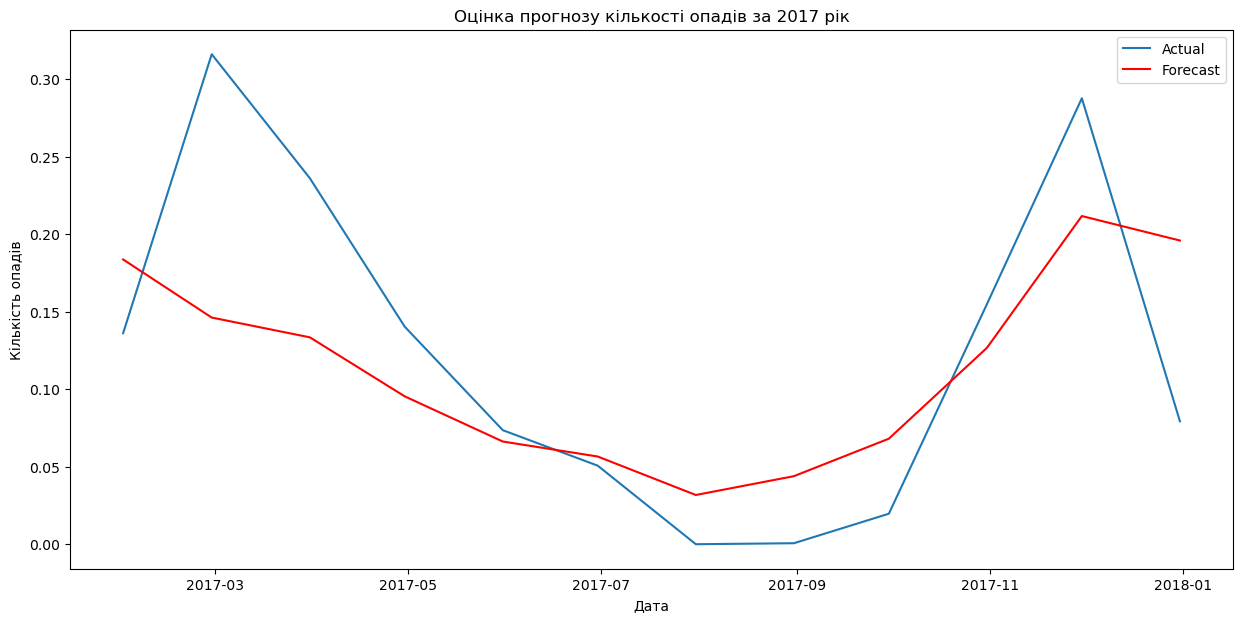

In [41]:
# Згрупуємо дані по місяцях і знайдемо середнє значення опадів за кожен місяць
df_monthly = w_df['PRCP'].resample('M').mean()
df_monthly = pd.DataFrame(df_monthly)

# Побудуємо SARIMA модель
model = sm.tsa.SARIMAX(df_monthly, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Зробимо прогноз на 12 місяців у 2017 році
forecast_2017 = model_fit.forecast(steps=len(df_monthly))

# Оцінимо точність прогнозу за 2017 рік
from sklearn.metrics import mean_absolute_error, mean_squared_error
train_data = df_monthly.loc[:'2016-12-31']
test_data = df_monthly.loc['2017-01-01':]
forecast_2017 = model_fit.forecast(steps=len(test_data))
mae = mean_absolute_error(test_data, forecast_2017)
rmse = mean_squared_error(test_data, forecast_2017, squared=False)
print(f'Середня абсолютна помилка: {mae:.2f}')
print(f'Корінь з середнього квадратичного відхилення: {rmse:.2f}')

plt.figure(figsize=(15, 7))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast_2017, label='Forecast', color='red')
plt.xlabel('Дата')
plt.ylabel('Кількість опадів')
plt.title('Оцінка прогнозу кількості опадів за 2017 рік')
plt.legend()
plt.show()

<h2>Виконала студентка групи ІП-21 <br> Гордич Оксана</h2>
